# Lab 5, Gautam Kovoor, Section AD

# Introduction

This lab is the first of a 4 part lab sequence in PHYS 434, where we get the opportunity to work with more realistic data. For this first lab, my lab partners and I decided to work with particle physics data from the Large Hadron Collider (LHC). Before we dive into our analysis of the data, we need to define and summarize a few key concepts.

## Fundamental Interactions

This is also referred to as the 4 fundamental forces of nature, ones that govern how particles interact and decay. Simply put, these are the 4 forces that govern our universe. These forces vary in terms of Particles involved, Range and Strength. 

**Gravity** is the force that attracts two bodies together; it was discovered by Sir Isaac Newton in the 17th Century. This is the most familiar fundamental force. It has an infinite range, and is the weakest of the four forces.

**Electromagnetic Force** is the fundamental force that is concerned with electric and magnetic fields. It is the force between charged particles such as electrons and protons. As with gravity it acts over an infinite range.

**Weak Force** is the fundamental force that is responsible for particle decay, which is the transformation of one type of subatomic particle to another. The weak force is specifically concerned with bosons, a type of subatomic particle (we will get to this in the standard model section). Out of the four fundamental forces it has the smallest range.

**Strong Force** is the strongest fundamental force. It is the force concerned with binding the fundamental particles of matter (quarks) together. It is the force that holds a nucleus together, and is greater than the force of repulsion between protons.

## The Standard Model

The Standard Model is a theory of fundamental particles and how they interact with each other. 

<img src="standardmodel.jpg">

It divides up the fundamental particles of matter into two catgeories. *Fermions* which are the building blocks of mater or *Bosons* which are the force carriers, the particles responsible for interactions.  

## The Higgs Boson

Over time physicists began to understand the relationships between the fundamental forces better, especially the ties between the electromagnetic and weak force. The idea of the Higgs Boson stemmed from a comparison of how photons and W&Z bosons interacted.

Before the Higgs Boson was the idea of a **Higgs Field**. This was a theory that believed that particles originally had no mass, and gained mass as they passed through a field. Photons would pass through the field and have no change in mass, but W and Z bosons would end up being 80 times larger. The only explanation for such a field to exist, was for there to be a corresponding particle, i.e. the **Higgs Boson**.

In July 2012, the ATLAS and CMS detectors at the LHC announced that a new particle with a mass of around 125 GeV had been discovered, one consistent with the idea of the Higgs Boson particle.

## The search for the Standard Model Higgs Boson

The Higgs Boson is a highly unstable subatomic particle, and it is said that when it interacts with other particles it decays into other subatomic particles. Roughly 58% of the time, it ends up as a pair of bottom quarks. Testing this statistic would prove the standard model, as it shows that the Higgs Boson gives mass to the fundamental particles.

Both the ATLAS and CMS detectors at the LHC would look for the decay of the Higgs Boson into a pair of bottom quarks, with a significance greater than 5$\sigma$. The way the LHC works is that it routinely makes pairs of protons travelling almost at the speed of light collide with each other. When one part of the proton hits the corresponding part in the other proton, the two parts get ejected from the proton. When this part is kicked out, it creates a 'jet', or multiple particles being scattered out. The goal is to find the jets specific to the decay of a Higgs Boson into two bottom quarks in the background of other random jets. The background is due to quantum chromodynamics (QCD) which is the **strong force** that holds particles together, it creates a multi-jet background.

## Table of our Data

This table of data consists of jet descriptor variables, simple data that describes the jets that detectors are observing. We have a total of 14 different descriptors.

|**Jet Descriptors**|
|---|
|Transverse Momentum ($p_t$)|
|Psuedo-Rapidity (eta)|
|Azimuthal Angle ($\phi$)|
|Mass|
|2-point ECF ratio (ee2)|
|3-point ECF ratio (ee3)|
|3 to 2 point ECF ratio (d2)|
|Angularity|
|1-subjettiness (t1)|
|2-subjettiness (t2)|
|3-subjettiness (t3)|
|2-1 subjettiness (t21)|
|3-2 subjettiness (t32) |
|$\Delta R$ of two subjets within the large-R jet (KtDeltaR)|

In [195]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

In [196]:
infile = open('higgs_100000_pt_1000_1200.pkl', 'rb')
signal = pickle.load(infile)
signal.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [197]:
pt = np.array(signal.get('pt'))
eta = np.array(signal.get('eta'))
phi = np.array(signal.get('phi'))
mass = np.array(signal.get('mass'))
ee2 = np.array(signal.get('ee2'))
ee3 = np.array(signal.get('ee3'))
d2 = np.array(signal.get('d2'))
angularity = np.array(signal.get('angularity'))
t1 = np.array(signal.get('t1'))
t2 = np.array(signal.get('t2'))
t3 = np.array(signal.get('t3'))
t21 = np.array(signal.get('t21'))
t32h = np.array(signal.get('t32'))
KtDeltaR = np.array(signal.get('KtDeltaR'))

In [198]:
#data
# Check if the size is 100k
#print('Size of the Data is: ', len(data))

In [199]:
infile2 = open('qcd_100000_pt_1000_1200.pkl', 'rb')
background = pickle.load(infile2)
background.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [200]:
pt2 = np.array(background.get('pt'))
eta2 = np.array(background.get('eta'))
phi2 = np.array(background.get('phi'))
mass2 = np.array(background.get('mass'))
ee22 = np.array(background.get('ee2'))
ee32 = np.array(background.get('ee3'))
d22 = np.array(background.get('d2'))
angularity2 = np.array(background.get('angularity'))
t12 = np.array(background.get('t1'))
t22 = np.array(background.get('t2'))
t32 = np.array(background.get('t3'))
t212 = np.array(background.get('t21'))
t322 = np.array(background.get('t32'))
KtDeltaR2 = np.array(background.get('KtDeltaR'))

# Exploring our Data

## Transverse Momentum

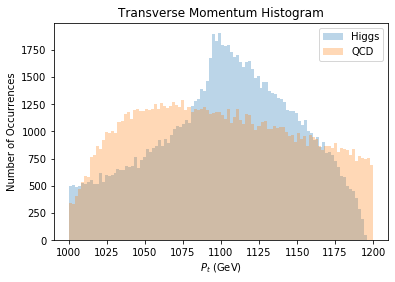

In [201]:
# Use alpha value to compare histograms
fig, axs = plt.subplots(1, 1)
axs.set_title('Transverse Momentum Histogram')
axs.hist(pt, bins=100, alpha=0.3, label='Higgs')
axs.hist(pt2, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('$P_t$ (GeV)')
axs.legend()
plt.show()

Above we can see the two histograms of transverse momentum. The blue one represents QCD which is the background, and the orange one represents Higgs which is the signal. We can see that the Higgs signal has a sharp spike at around the 1100 GeV mark. It is also worth mentioning that the histograms show all the 100,000 data points, and the Higgs histogram seems to end before the QCD histogram.

## Pseudo-Rapidity

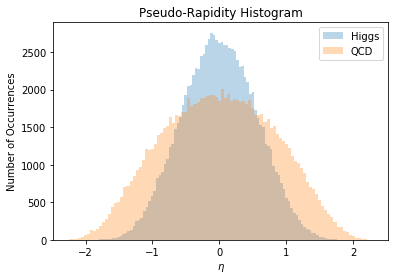

In [202]:
fig, axs = plt.subplots(1, 1)
axs.set_title('Pseudo-Rapidity Histogram')
axs.hist(eta, bins=100, alpha=0.3, label='Higgs')
axs.hist(eta2, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('$\eta$')
axs.legend()
plt.show()

Let's take a look at the plots side by side.

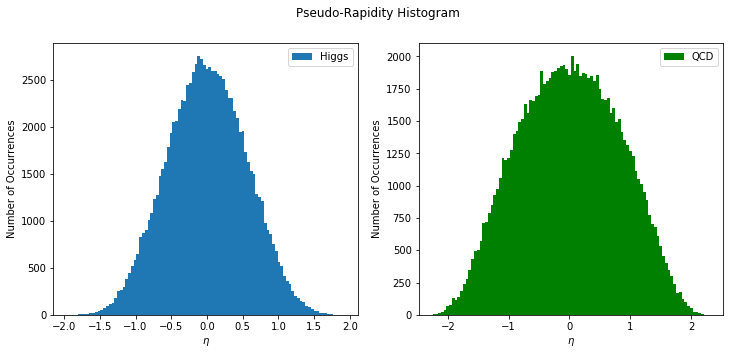

In [203]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Pseudo-Rapidity Histogram')
axs1.hist(eta, bins=100, label='Higgs')
axs2.hist(eta2, bins=100, color='g', label='QCD')
axs1.set_ylabel('Number of Occurrences')
axs1.set_xlabel('$\eta$')
axs2.set_ylabel('Number of Occurrences')
axs2.set_xlabel('$\eta$')
axs1.legend()
axs2.legend()
plt.show()

This plot shows the two histograms representing the Pseudo-rapidity data points in the Higgs and QCD data. This is the spatial coordinate that describes the angle of the particle relative to the beam axis. Both these histograms follow a normal distribution with a mean of roughly 0.

## Azimuthal Angle 

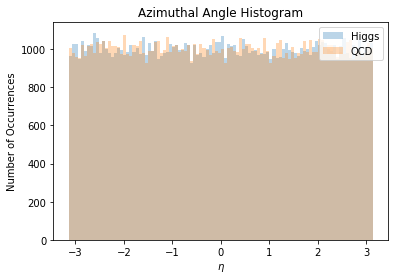

In [204]:
fig, axs = plt.subplots(1, 1)
axs.set_title('Azimuthal Angle Histogram')
axs.hist(phi, bins=100, alpha=0.3, label='Higgs')
axs.hist(phi2, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('$\eta$')
axs.legend()
plt.show()

The azimuthal angle represents the angle of the particle in the x-y plane. It is a bit difficult to see the differences between the Higgs and QCD data so let's plot them seperately.

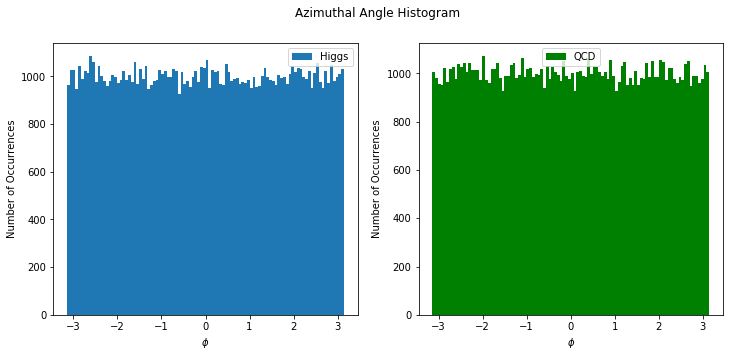

In [205]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Azimuthal Angle Histogram')
axs1.hist(phi, bins=100, label='Higgs')
axs2.hist(phi2, bins=100, color='g', label='QCD')
axs1.set_ylabel('Number of Occurrences')
axs1.set_xlabel('$\phi$')
axs2.set_ylabel('Number of Occurrences')
axs2.set_xlabel('$\phi$')
axs1.legend()
axs2.legend()
plt.show()

Both histograms show high numbers of occurrences for both the Higgs and QCD background, with little to no difference in the two.

## Mass 

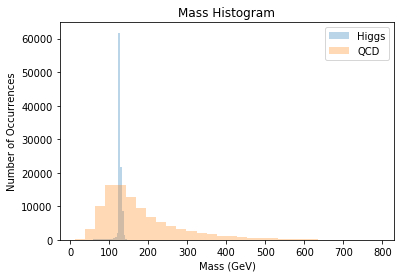

In [206]:
fig, axs = plt.subplots(1, 1)
axs.set_title('Mass Histogram')
axs.hist(mass, bins=30, alpha=0.3, label='Higgs')
axs.hist(mass2, bins=30, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('Mass (GeV)')
axs.legend()
plt.show()

Above is a plot of both the mass histograms for the Higgs and QCD data. When we look at the plot of the Higgs data we can see that it there is a large spike at around 125 GeV which if you recall from in our definitions is roughly the mass of the Higgs Boson particle. 

## 2 Point ECF Ratio

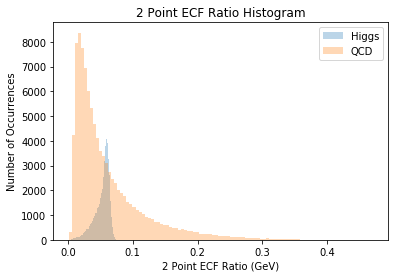

In [207]:
fig, axs = plt.subplots(1, 1)
axs.set_title('2 Point ECF Ratio Histogram')
axs.hist(ee2, bins=100, alpha=0.3, label='Higgs')
axs.hist(ee22, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('2 Point ECF Ratio (GeV)')
axs.legend()
plt.show()

A two point energy correlation function is use for quark/gluon discrimination. In this plot, both histograms are set at different means and are opposite skews of each other. The mean of the Higgs Histogram is rougly 0.07 and roughly 0.03 for the QCD Histogram.

## 3 Point ECF Ratio

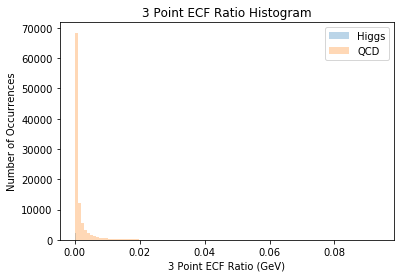

In [208]:
fig, axs = plt.subplots(1, 1)
axs.set_title('3 Point ECF Ratio Histogram')
axs.hist(ee3, bins=100, alpha=0.3, label='Higgs')
axs.hist(ee32, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('3 Point ECF Ratio (GeV)')
axs.legend()
plt.show()

A three point energy correlation function is used for W/Z/Higgs identification. In this plot, the Higgs data is difficult to see so we shall plot them side by side.

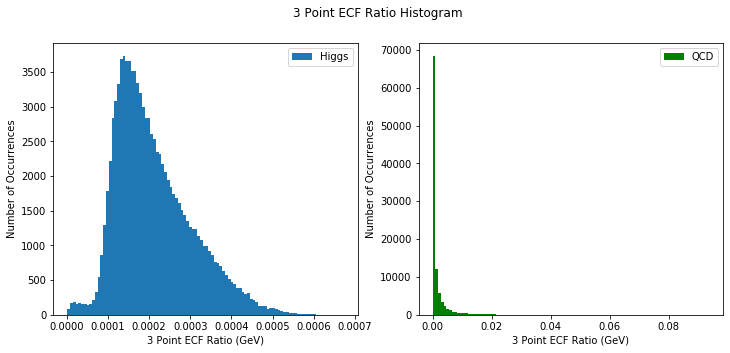

In [209]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('3 Point ECF Ratio Histogram')
axs1.hist(ee3, bins=100, label='Higgs')
axs2.hist(ee32, bins=100, color='g', label='QCD')
axs1.set_ylabel('Number of Occurrences')
axs1.set_xlabel('3 Point ECF Ratio (GeV)')
axs2.set_ylabel('Number of Occurrences')
axs2.set_xlabel('3 Point ECF Ratio (GeV)')
axs1.legend()
axs2.legend()
plt.show()

The number of occurences of Higgs is a little lower than the 2 Point ECF ratio, with the highest number of occerrences located close to zero for both histograms. The mean for the Higgs Histogram is 0.00015 and the mean for the QCD Histogram is 0.001.

## 3 to 2 point ECF Ratio

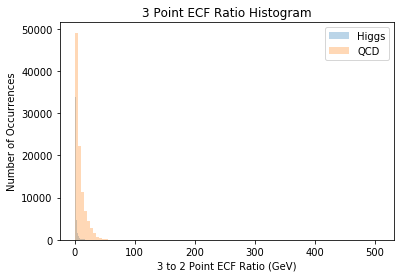

In [210]:
fig, axs = plt.subplots(1, 1)
axs.set_title('3 Point ECF Ratio Histogram')
axs.hist(d2, bins=100, alpha=0.3, label='Higgs')
axs.hist(d22, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('3 to 2 Point ECF Ratio (GeV)')
axs.legend()
plt.show()

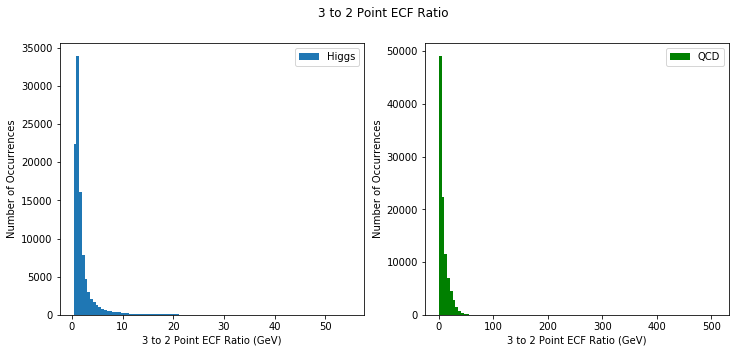

In [211]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('3 to 2 Point ECF Ratio')
axs1.hist(d2, bins=100, label='Higgs')
axs2.hist(d22, bins=100, color='g', label='QCD')
axs1.set_ylabel('Number of Occurrences')
axs1.set_xlabel('3 to 2 Point ECF Ratio (GeV)')
axs2.set_ylabel('Number of Occurrences')
axs2.set_xlabel('3 to 2 Point ECF Ratio (GeV)')
axs1.legend()
axs2.legend()
plt.show()

This is known as a four point correlator and is used for boosted top quark identification. Both the histograms are skewed in the same direction, with fewer occurrences in the Higgs data. 

## Angularity

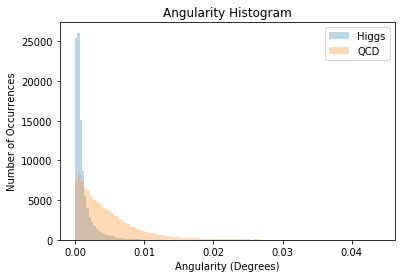

In [212]:
fig, axs = plt.subplots(1, 1)
axs.set_title('Angularity Histogram')
axs.hist(angularity, bins=100, alpha=0.3, label='Higgs')
axs.hist(angularity2, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('Angularity (Degrees)')
axs.legend()
plt.show()

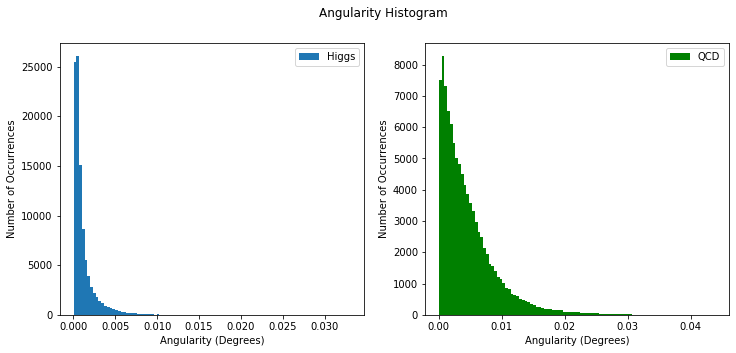

In [213]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Angularity Histogram')
axs1.hist(angularity, bins=100, label='Higgs')
axs2.hist(angularity2, bins=100, color='g', label='QCD')
axs1.set_ylabel('Number of Occurrences')
axs1.set_xlabel('Angularity (Degrees)')
axs2.set_ylabel('Number of Occurrences')
axs2.set_xlabel('Angularity (Degrees)')
axs1.legend()
axs2.legend()
plt.show()

Angularity models energy flow inside a jet and is dependent on the degree of symmetry. There is a higher number of occurrences at around 0 for the Higgs histograms with a sharm decline after zero. For the QCD histogram it is a gradual decline in the number of occurrences after 0. The mean for the Higgs histogram is roughly 0.002 and roughly 0.004 for the QCD histogram.

## 1-subjettiness

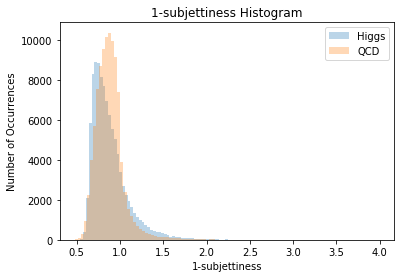

In [214]:
fig, axs = plt.subplots(1, 1)
axs.set_title('1-subjettiness Histogram')
axs.hist(t1, bins=100, alpha=0.3, label='Higgs')
axs.hist(t12, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('1-subjettiness')
axs.legend()
plt.show()

## 2-subjettiness

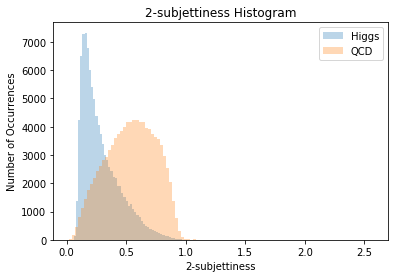

In [215]:
fig, axs = plt.subplots(1, 1)
axs.set_title('2-subjettiness Histogram')
axs.hist(t2, bins=100, alpha=0.3, label='Higgs')
axs.hist(t22, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('2-subjettiness')
axs.legend()
plt.show()

## 3-subjettiness

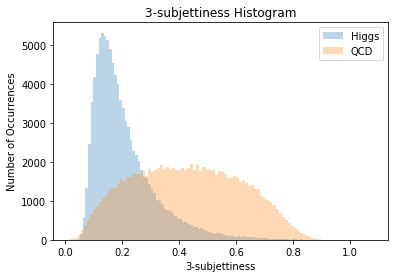

In [216]:
fig, axs = plt.subplots(1, 1)
axs.set_title('3-subjettiness Histogram')
axs.hist(t3, bins=100, alpha=0.3, label='Higgs')
axs.hist(t32, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('3-subjettiness')
axs.legend()
plt.show()

## 2-1 subjettiness

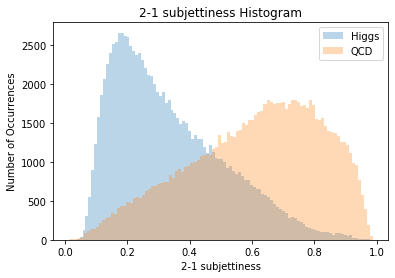

In [217]:
fig, axs = plt.subplots(1, 1)
axs.set_title('2-1 subjettiness Histogram')
axs.hist(t21, bins=100, alpha=0.3, label='Higgs')
axs.hist(t212, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('2-1 subjettiness')
axs.legend()
plt.show()

## 3-2 subjettiness

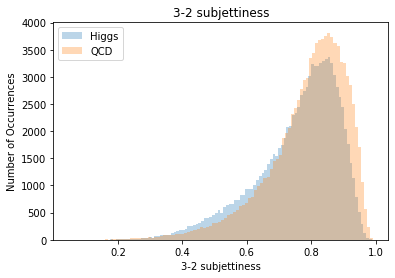

In [218]:
fig, axs = plt.subplots(1, 1)
axs.set_title('3-2 subjettiness')
axs.hist(t32h, bins=100, alpha=0.3, label='Higgs')
axs.hist(t322, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('3-2 subjettiness')
axs.legend()
plt.show()

The N-subjettiness is a jet shape that aims to identify different jets based on the N number of subjects they are made of. Above we have plotted the 1,2 and 3 subjettiness histograms as well as the ratios 2-1 and 3-2. A comparison of all plots shows that the 2-1 subjettiness plot is has the highest discrimination power between the signal and background. As we go through the plots from 1-3 subjettiness they began to center further and further away from zero in the Higgs histograms. The QCD histograms follow the same patterns and grow in width.

In the ratio subjettiness plots, we can see that in the 2-1 subjettiness both histograms are skewed in the opposite direction and centered around different values. In the 3-2 subjettiness plots both historgrams are skewed in the same direction and look roughly the same. The notable difference is that the QCD histogram has a slightly higher mean than the Higgs histogram.

## $K_t \Delta R$

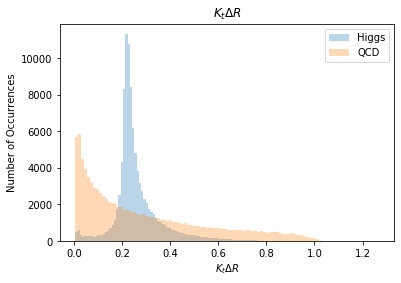

In [219]:
fig, axs = plt.subplots(1, 1)
axs.set_title('$K_t \Delta R$')
axs.hist(KtDeltaR, bins=100, alpha=0.3, label='Higgs')
axs.hist(KtDeltaR2, bins=100, alpha=0.3, label='QCD')
axs.set_ylabel('Number of Occurrences')
axs.set_xlabel('$K_t \Delta R$')
axs.legend()
plt.show()

I wasn't able to find out much about $K_t \Delta R$ but in terms of the histograms it is obvious that the Higgs plot has higher occurrences at around 0.2 compared toeh QCD plot which has higher occurrences at around 0. The QCD histogram also drops after 0, compared to the Higgs histograms which does so after approximately 0.25.

## Lastly, it is also worth noting that most of the histograms followed a Rayleigh distribution this included:
    - 2 point ECF Ratio
    - 3 point ECF Ratio
    - 3-2 point ECF Ratio
    - Angularity
    - Higgs 1-subjettiness
    - Higgs 2-subjettiness
    - Higgs 3-subjettiness
    - Higgs 2-1 subjettiness